## Currency Conversion #
---

### Table of Contents

1. Introduction


2. Load Required Packages


3. Define Currency pairs


4. Get Data for the Tickers


5. Convert Base Currency to Quoted Currency

---


### 1. Introduction

Investopedia (https://www.investopedia.com/terms/c/currencypair.asp#:~:text=A%20currency%20pair%20is%20the,is%20called%20the%20quote%20currency)  defines a currency pair as a quotation of two different curriencies with value of one currency (Base Currency) being quoted against the other (Quoted Currency).

In a curency pair the first currency is the base and the second is the quoted. The pair is represented as BaseQuoted=X which interpretes as 1 Base Currency is equal to X Quoted Currency. for example, a quote of USDZMW=15.65 means that USD1 is equal to ZMW15.65.

We will develope a program that will allow a user to enter an amount to be converted from one currency to another and also provide a historical visualisation of the performance of the selected currency pair over a one month period.

---

### 2. Load Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import yfinance as yf

### 3. Define Curreny Pair Variables

We will reference all the currencies to the USD with the USD as the base currency and the other curriencies as the quoted currency. This will allow us to convert the curriencies between the other curriencies based on their conversion rates with the USD. 

The symbols for the circulating currencies can be checked from https://en.wikipedia.org/wiki/List_of_circulating_currencies

In [2]:
amount = float(input("Enter the Amount to Convert: ")) 
base = input("Enter Currency to Convert From: ")
quoted= input("Enter Currency to Convert To: ")
print("\nYou want to convert " + str(amount) + " " + base.upper() + " to " + quoted.upper())

Enter the Amount to Convert: 234
Enter Currency to Convert From: gbp
Enter Currency to Convert To: zmw

You want to convert 234.0 GBP to ZMW


In [3]:
# ticker symbols for USD as base currency 
base = base.upper()
quoted = quoted.upper()

if base=="EUR":
    base_ticker = "USDEUR=X"
else:
    base_ticker = base + "=X"

if quoted=="EUR":
    quoted_ticker = "USDEUR=X"
else:
    quoted_ticker = quoted + "=X"

### 4. Get the Data for the Tickers

In [4]:
#download 1 month data for the two currencies against the USD
base_data = yf.download(base_ticker, period="1mo")[["Adj Close"]]
quoted_data = yf.download(quoted_ticker, period="1mo")[["Adj Close"]]

#change column names
base_data.columns = [base_ticker]
quoted_data.columns = [quoted_ticker]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#if base is USD then USD/USD=1
#fill the base_data dataframe with ones if base is USD
if base=="USD":
    base_data = quoted_data.copy()
    base_data.columns = [base_ticker]
    base_data[base_ticker] = base_data[base_ticker]/base_data[base_ticker]
    
else:
    base_data = base_data
    
#if quoted is USD then USD/USD=1
#fill the quoted_data dataframe with ones if quoted is USD
if quoted=="USD":
    quoted_data = base_data.copy()
    quoted_data.columns = [quoted_ticker]
    quoted_data[quoted_ticker] = quoted_data[quoted_ticker]/quoted_data[quoted_ticker]
    
else:
    base_data = base_data

In [6]:
#merge the two dataframes for the two currencies

data = pd.merge(base_data, quoted_data,
               left_index=True, right_index=True)

data.tail()

,GBP=X,ZMW=X
Date,,
2022-09-13,0.85545,15.453927
2022-09-14,0.86910,15.469543
2022-09-15,0.86618,15.500864
2022-09-16,0.87316,15.517041
2022-09-19,0.87744,15.650000


In [7]:
#currency pair
currency_pair = base + "/" + quoted

#add column for the currency pair exchange
data[currency_pair] = data[quoted_ticker]/ data[base_ticker]

data.head()

,GBP=X,ZMW=X,GBP/ZMW
Date,,,
2022-08-19,0.83803,16.074284,19.181036
2022-08-22,0.84616,16.100779,19.028055
2022-08-23,0.84987,16.079695,18.920181
2022-08-24,0.84511,16.118629,19.072818
2022-08-25,0.84805,16.081800,18.963269


### 5. Convert Base Currency to Quoted Currency

In [8]:
#the latest exchange is the last data point in the currency_pair column
current_ex = round(data[currency_pair][-1],2)
calc_ex = round(current_ex * amount,2)

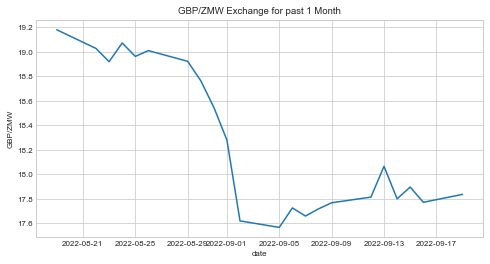


1.0 GBP is equal to 17.84 ZMW
234.0 GBP is equal to 4174.56 ZMW


In [10]:
#plot historical excahnge between base and quoted
plt.figure(figsize=(8,4))
plt.plot(data.index, data[currency_pair])
plt.title(currency_pair + " Exchange for past 1 Month")
plt.xlabel("date")
plt.ylabel(currency_pair)
plt.rcParams['font.size'] = 8
plt.show()

#print out the calculated conversion
print('\033[1m') #set the printout in bold
print("1.0 " + base + " is equal to " + str(current_ex) + " " + quoted)

print(str(amount) + " " + base + " is equal to " + str(calc_ex) + " " + quoted)